<a href="https://colab.research.google.com/github/ajlukasiewicz/Team_9_MacLearn/blob/Muyoung/decisionTree_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Data uploading and cleaning

In [2]:
#from google.colab import files
#uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dbcan = pd.read_csv("/content/drive/MyDrive/sds384_team_project/dbcan_result.3772genomes.matrix.divided_by_gene_counts.tsv", sep="\t")
print(dbcan.shape)
dbcan.head()

(3772, 352)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL39,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cog = pd.read_csv("/content/drive/MyDrive/sds384_team_project/cog_ratios.csv")
print(cog.shape)
cog = cog[cog["Gene_Count___*_assembled"] > 0]
print(cog.shape)
cog.head()

(3837, 4216)
(3772, 4216)


,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,NPA,0.66,5886.0
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,0.24,5452.0
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,4.34,1359.0
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,NPA,0.20,6637.0
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,PA,1.93,6738.0


In [5]:
ko = pd.read_csv("/content/drive/MyDrive/sds384_team_project/ko_ratios.csv")
print(ko.shape)
ko = ko[ko["Gene_Count___*_assembled"] > 0]
print(ko.shape)
ko.head()

(3837, 8045)
(3772, 8045)


,Unnamed: 0,2016_taxon_oid,KO:K00001,KO:K00002,KO:K00003,KO:K00004,KO:K00005,KO:K00007,KO:K00008,KO:K00009,...,KO:K19775,KO:K19776,KO:K19777,KO:K19778,KO:K19784,KO:K19789,KO:K19792,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,108315.646925,0.0,108315.886397,108322.004191,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NPA,0.66,5886.0
1,1,637000023,116932.035033,0.0,116932.230496,116931.768892,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NPA,0.24,5452.0
2,2,637000028,469101.610743,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NPA,4.34,1359.0
3,3,637000046,96130.456381,0.0,96130.708905,96130.447190,0.0,96130.066898,96130.307217,0.0,...,0.0,0.0,0.0,0.0,96130.548591,0.0,0.0,NPA,0.20,6637.0
4,4,637000047,94709.523523,0.0,94709.241318,94709.456738,0.0,94709.182398,94709.415108,0.0,...,0.0,0.0,0.0,0.0,94709.528495,0.0,0.0,PA,1.93,6738.0


In [6]:
pfam = pd.read_csv("/content/drive/MyDrive/sds384_team_project/pfam_ratios.csv")
print(pfam.shape)
pfam = pfam[pfam["Gene_Count___*_assembled"] > 0]
print(pfam.shape)
pfam.head()

(3837, 8497)
(3772, 8497)


,Unnamed: 0,2016_taxon_oid,pfam00004,pfam00005,pfam00006,pfam00009,pfam00011,pfam00012,pfam00013,pfam00014,...,pfam17197,pfam17198,pfam17199,pfam17200,pfam17201,pfam17202,pfam17203,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,108315.827085,108316.206092,108316.067533,108315.763846,108315.709055,108315.920546,108315.964577,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,108315.442830,NPA,0.66,5886.0
1,1,637000023,116932.162937,116932.121066,116932.422276,116932.096234,116932.037142,116932.404255,116932.309519,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,116931.772744,NPA,0.24,5452.0
2,2,637000028,469101.753005,469180.954746,469102.080206,469101.530222,469101.460633,469101.303900,469101.396615,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,NPA,4.34,1359.0
3,3,637000046,96130.188501,96132.914638,96130.317312,96130.090017,96130.311737,96130.211993,96130.016724,0.0,...,0.0,0.0,0.0,96130.425908,96130.384812,0.0,0.000000,NPA,0.20,6637.0
4,4,637000047,94709.152228,94709.248084,94709.162857,94709.002721,94709.427011,94709.199110,94709.131048,0.0,...,0.0,0.0,0.0,94709.474622,94709.343425,0.0,0.000000,PA,1.93,6738.0


In [7]:
total = dbcan.merge(cog.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]
total = total.merge(ko.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]
total = total.merge(pfam.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]

del dbcan
del cog
del ko
del pfam

print(total.shape)
total.head()

(3772, 21095)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,pfam17194,pfam17195,pfam17196,pfam17197,pfam17198,pfam17199,pfam17200,pfam17201,pfam17202,pfam17203
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#total.to_csv("cleaned_data.tsv", sep="\t")

# Separating soil bacteria

In [29]:
df = total[total["Classification"] != "soil"]
print(df.shape)
df.head()

(3261, 21095)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,pfam17194,pfam17195,pfam17196,pfam17197,pfam17198,pfam17199,pfam17200,pfam17201,pfam17202,pfam17203
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature selection
1. Remove features with zero variance. (same values for all bacteria)
2. Select top 1000 features using Recursive feature elimination with random forest classifier
3. Remove highly correlated features (absolute value > 0.8)


In [34]:
features = total.columns[4:]
dependent_var = ["Classification"]

constant_filter = VarianceThreshold(threshold=0) # Filter for features with zero variance
constant_filter.fit(total[features])
features = constant_filter.get_feature_names_out(features)

In [31]:
#correlated_features = set()
#correlation_matrix = df[features].corr()

As expected, the calculation of correlations between 21k parameters took too much time.

In [35]:
X = df[features]
y = df[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.feature_selection import RFE
# The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=1000, step=0.05)
#Top 1000 #Remove the worst 5% of features at each iteration.
selector = selector.fit(X_train, y_train.values.ravel())

selected_features = X.columns[selector.get_support()]

In [38]:
correlation_matrix = df[selected_features].corr().abs()

In [49]:
threshold = 0.8
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_features_2 = selected_features[columns]

In [50]:
print(len(selected_features), len(selected_features_2))

1000 823


In [51]:
X = df[selected_features_2]
y = df[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Traning and testing the decision tree model

In [52]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf1 = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf1.fit(X_train, y_train)
  y_pred1 = clf1.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred1))

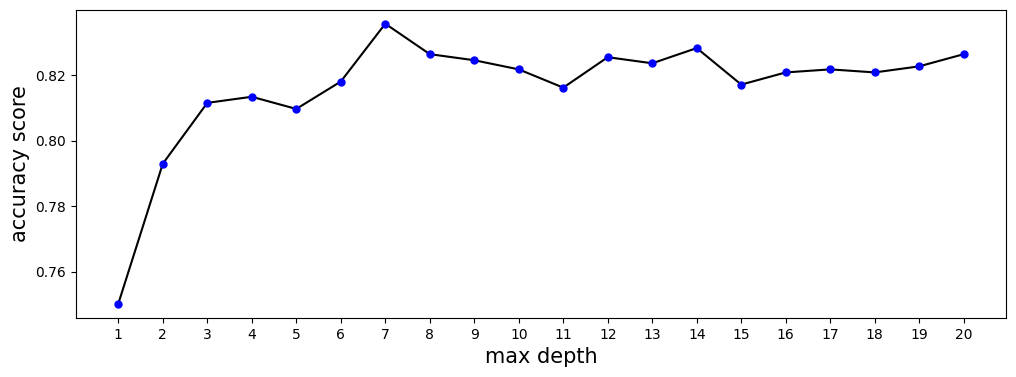

In [53]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [54]:
clf1 = tree.DecisionTreeClassifier(max_depth=7, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))

0.8356545961002786


In [55]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature importances are provided by the fitted attribute feature_importances_ and
# they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
importances = clf1.feature_importances_
forest_importances = pd.Series(importances, index=clf1.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG0667      0.308245
COG3131      0.097176
COG2608      0.072610
COG1703      0.041622
KO:K03649    0.034697
COG1346      0.031264
COG1301      0.024676
pfam16242    0.022046
COG0835      0.018378
COG0597      0.016095
COG0860      0.015840
COG1055      0.015519
COG3967      0.014427
COG2180      0.014164
COG1246      0.013797
COG4121      0.012758
pfam07617    0.012640
COG3754      0.011857
COG1840      0.010575
pfam12846    0.010207
dtype: float64

# Traning and testing the random forest model

In [56]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf2 = RandomForestClassifier(max_depth=depth, random_state=42)
  clf2.fit(X_train, y_train.values.ravel())
  y_pred2 = clf2.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred2))

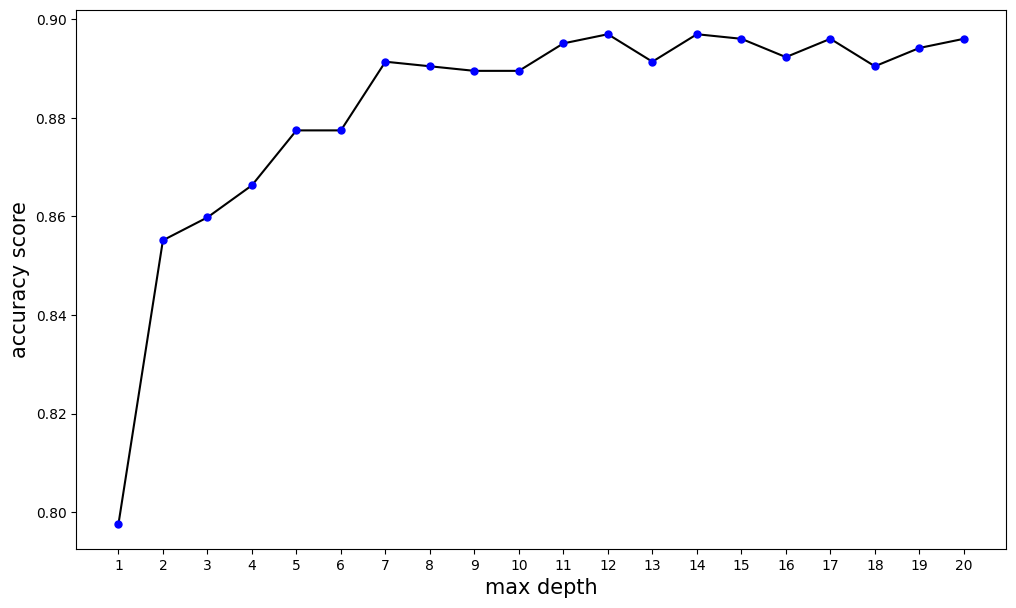

In [57]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [60]:
clf2 = RandomForestClassifier(max_depth=12, random_state=42)
clf2.fit(X_train, y_train.values.ravel())
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.8969359331476323


In [61]:
importances = clf2.feature_importances_
forest_importances = pd.Series(importances, index=clf2.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG3386      0.017405
KO:K00496    0.015180
COG0798      0.012907
COG1079      0.012688
COG2085      0.011213
KO:K04046    0.011123
COG1129      0.010969
pfam05368    0.010925
KO:K00301    0.010778
COG4213      0.010240
COG0667      0.008091
KO:K11177    0.007709
COG2608      0.007220
COG0514      0.007206
COG3569      0.007164
COG1349      0.006973
COG0467      0.006759
pfam13144    0.006657
COG0524      0.006453
COG1157      0.006165
dtype: float64

# Prediction on the soil bacteria using trained models

In [63]:
df = total[total["Classification"] == "soil"]
X = df[selected_features_2]
df["prediction1"] = clf1.predict(X)
df["prediction2"] = clf2.predict(X)
df[["taxonID", "Order", "Classification", "prediction1", "prediction2"]].head(10)

<ipython-input-63-cc65def7b900>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction1"] = clf1.predict(X)
<ipython-input-63-cc65def7b900>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction2"] = clf2.predict(X)


,taxonID,Order,Classification,prediction1,prediction2
3261,2534682017,Acinetobacter,soil,NPA,NPA
3262,2534682020,Acinetobacter,soil,PA,NPA
3263,2576861110,Acinetobacter,soil,NPA,NPA
3264,648028004,Acinetobacter,soil,NPA,NPA
3265,2502894011,Actinobacteria,soil,NPA,NPA
3266,2504756050,Actinobacteria,soil,NPA,NPA
3267,2506783014,Actinobacteria,soil,NPA,NPA
3268,2506783048,Actinobacteria,soil,NPA,NPA
3269,2511231200,Actinobacteria,soil,NPA,NPA
3270,2513237387,Actinobacteria,soil,NPA,NPA


#Visualization of the tree

[Text(0.5130494505494505, 0.9375, 'COG0667 <= 0.001\ngini = 0.458\nsamples = 2184\nvalue = [1409, 775]\nclass = PA'),
 Text(0.25618131868131866, 0.8125, 'COG3131 <= 0.0\ngini = 0.249\nsamples = 1274\nvalue = [1088, 186]\nclass = PA'),
 Text(0.14697802197802198, 0.6875, 'KO:K03649 <= 224886.203\ngini = 0.144\nsamples = 1117\nvalue = [1030, 87]\nclass = PA'),
 Text(0.08516483516483517, 0.5625, 'pfam16242 <= 415213.094\ngini = 0.101\nsamples = 1069\nvalue = [1012, 57]\nclass = PA'),
 Text(0.04395604395604396, 0.4375, 'GH39 <= 0.001\ngini = 0.032\nsamples = 926\nvalue = [911, 15]\nclass = PA'),
 Text(0.03296703296703297, 0.3125, 'COG2085 <= 0.0\ngini = 0.024\nsamples = 922\nvalue = [911, 11]\nclass = PA'),
 Text(0.02197802197802198, 0.1875, 'COG1319 <= 0.001\ngini = 0.017\nsamples = 919\nvalue = [911, 8]\nclass = PA'),
 Text(0.01098901098901099, 0.0625, 'gini = 0.013\nsamples = 917\nvalue = [911, 6]\nclass = PA'),
 Text(0.03296703296703297, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\

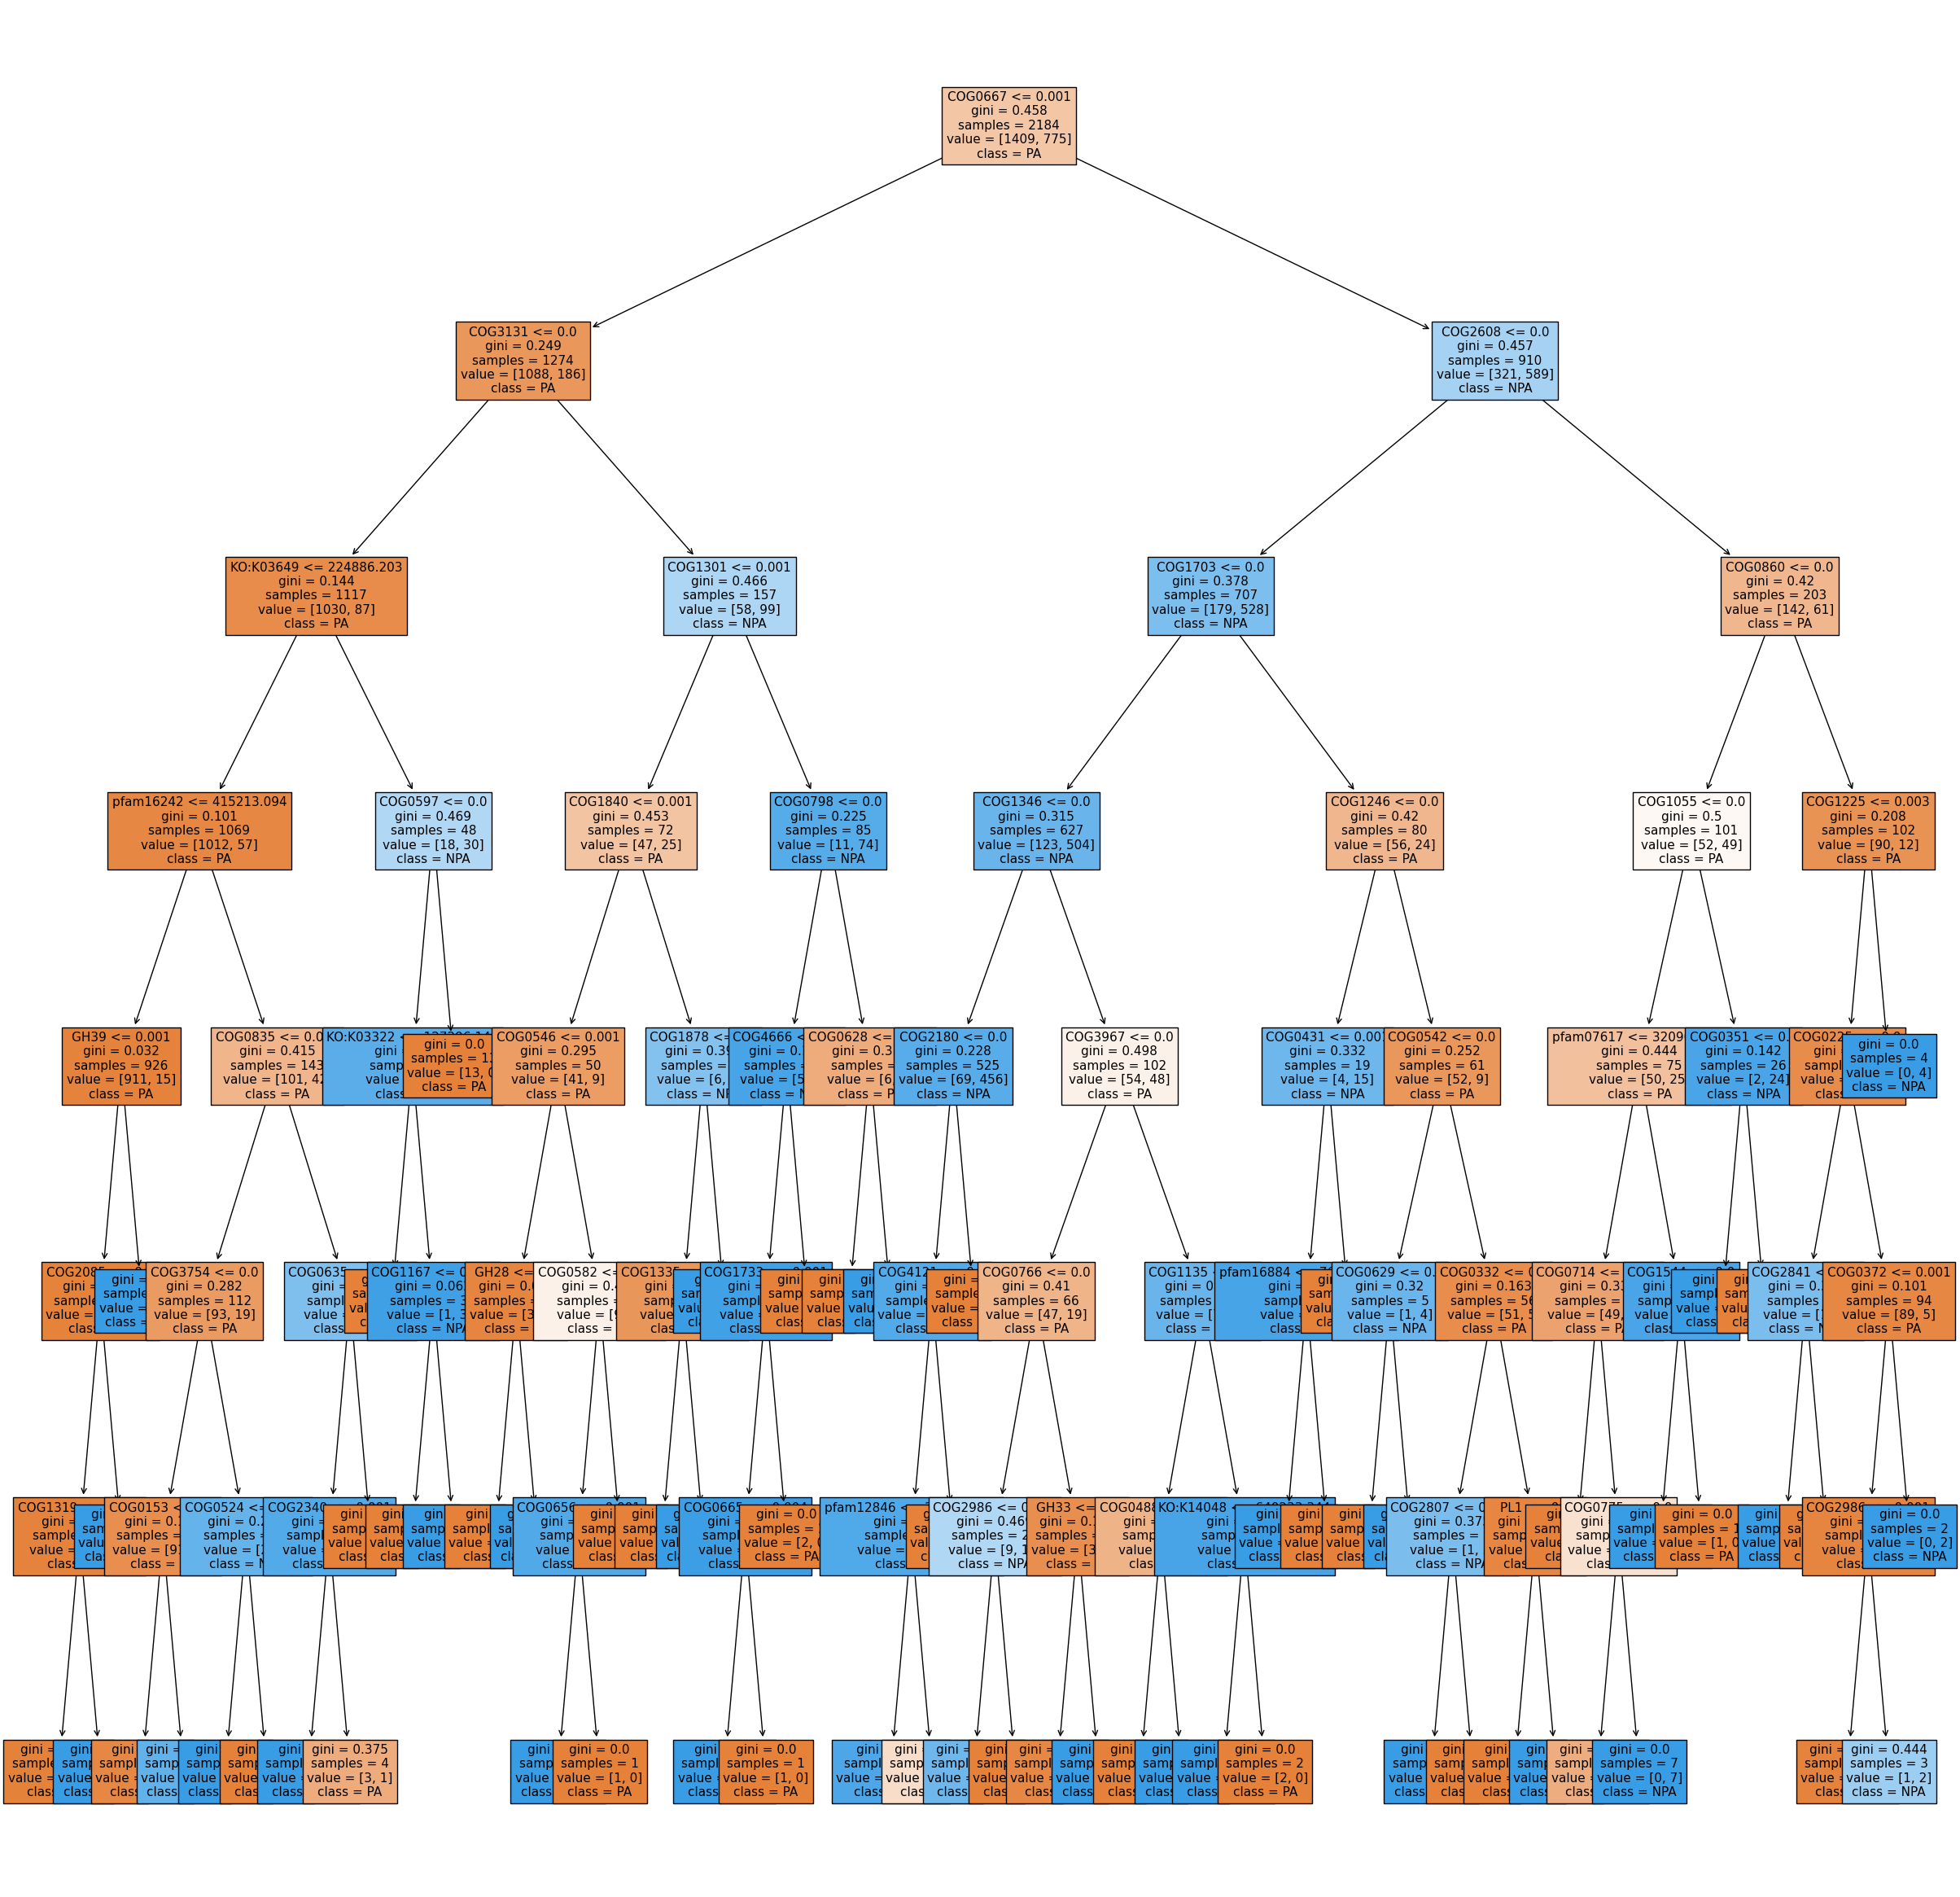

In [64]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf1, fontsize=11, feature_names=selected_features_2, class_names=["PA", "NPA"], filled=True)